<a href="https://colab.research.google.com/github/VishalSingh1703/Covid-Detection/blob/main/Covid_Detection_Using_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Import Necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# 2.Read the dataset

In [ ]:
covid_data = pd.read_csv("Covid Dataset_.csv")

# 3.Analyse the dataset and Visualize it

In [ ]:
covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [ ]:
covid_data.shape

(5434, 21)

In [ ]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5397 non-null   object
 1   Fever                                    5351 non-null   object
 2   Dry Cough                                5361 non-null   object
 3   Sore throat                              5351 non-null   object
 4   Running Nose                             5361 non-null   object
 5   Asthma                                   5351 non-null   object
 6   Chronic Lung Disease                     5397 non-null   object
 7   Headache                                 5397 non-null   object
 8   Heart Disease                            5397 non-null   object
 9   Diabetes                                 5397 non-null   object
 10  Hyper Tension                            5361 non-null   obj

In [ ]:
covid_data.describe().T

,count,unique,top,freq
Breathing Problem,5397,2,Yes,3594
Fever,5351,2,Yes,4205
Dry Cough,5361,2,Yes,4252
Sore throat,5351,2,Yes,3890
Running Nose,5361,2,Yes,2911
Asthma,5351,2,No,2875
Chronic Lung Disease,5397,2,No,2843
Headache,5397,2,Yes,2719
Heart Disease,5397,2,No,2891
Diabetes,5397,2,No,2828


In [ ]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


# Checking For null Value

In [ ]:
covid_data.isnull().sum()

Breathing Problem                          37
Fever                                      83
Dry Cough                                  73
Sore throat                                83
Running Nose                               73
Asthma                                     83
Chronic Lung Disease                       37
Headache                                   37
Heart Disease                              37
Diabetes                                   37
Hyper Tension                              73
Fatigue                                    37
Gastrointestinal                           83
Abroad travel                              73
Contact with COVID Patient                 47
Attended Large Gathering                   83
Visited Public Exposed Places              83
Family working in Public Exposed Places    73
Wearing Masks                              83
Sanitization from Market                   73
COVID-19                                   73
dtype: int64

In [ ]:
# create a table with data missing
missing_values=covid_data.isnull().sum() # missing values

percent_missing = covid_data.isnull().sum()/covid_data.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Breathing Problem,37,0.680898
Fever,83,1.527420
Dry Cough,73,1.343393
Sore throat,83,1.527420
Running Nose,73,1.343393
Asthma,83,1.527420
Chronic Lung Disease,37,0.680898
Headache,37,0.680898
Heart Disease,37,0.680898
Diabetes,37,0.680898


# Replacing the null value with modal value of column

In [ ]:
covid_data = covid_data.apply(lambda col: col.fillna(col.mode()[0]))

<Axes: >

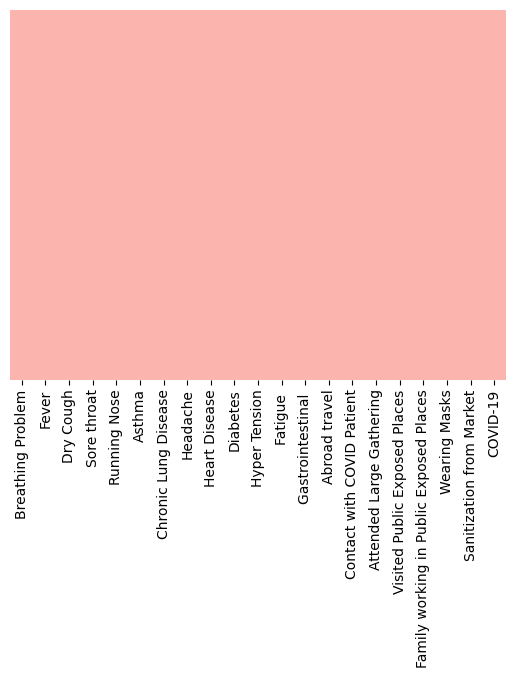

In [ ]:
sns.heatmap(covid_data.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')

<ipython-input-51-10afb37cd96c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='COVID-19',data=covid_data, palette="PuRd")


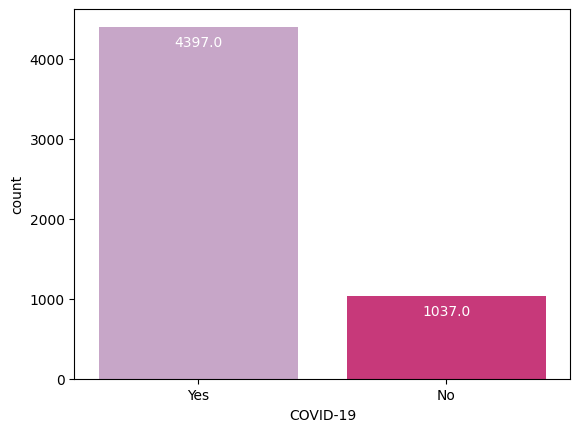

In [ ]:
ax = sns.countplot(x='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

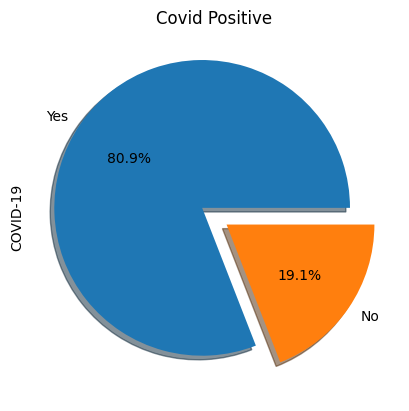

In [ ]:
covid_data["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');

<ipython-input-53-10854806ba23>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Breathing Problem',data=covid_data, palette="Set1")


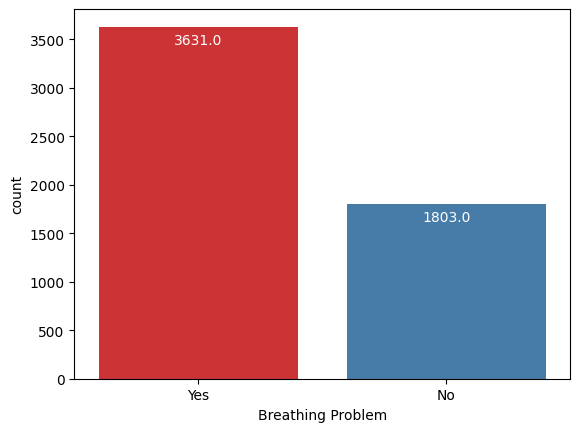

In [ ]:
ax = sns.countplot(x='Breathing Problem',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

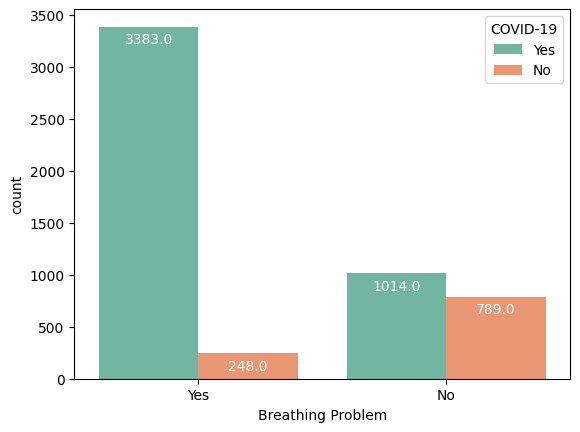

In [ ]:
ax = sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

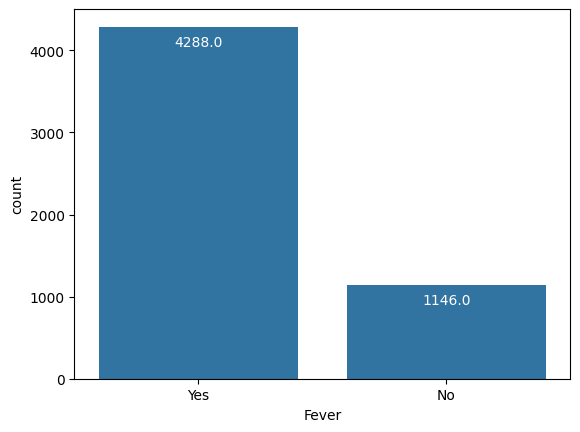

In [ ]:
ax = sns.countplot(x='Fever',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

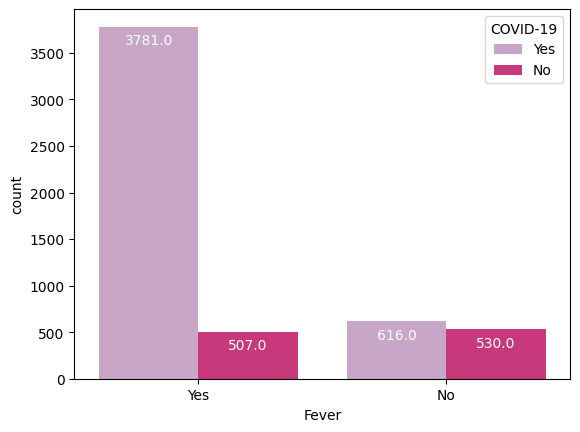

In [ ]:
ax = sns.countplot(x='Fever',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

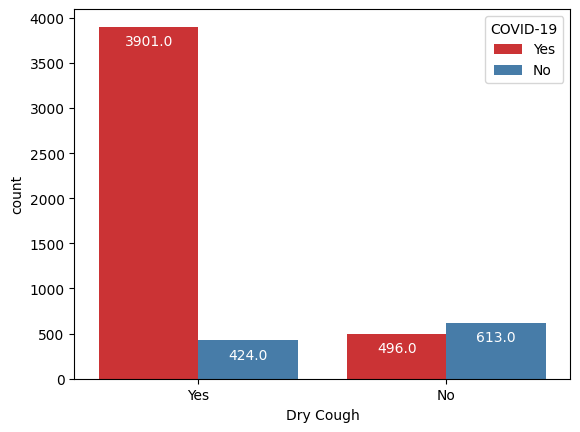

In [ ]:
ax = sns.countplot(x='Dry Cough',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

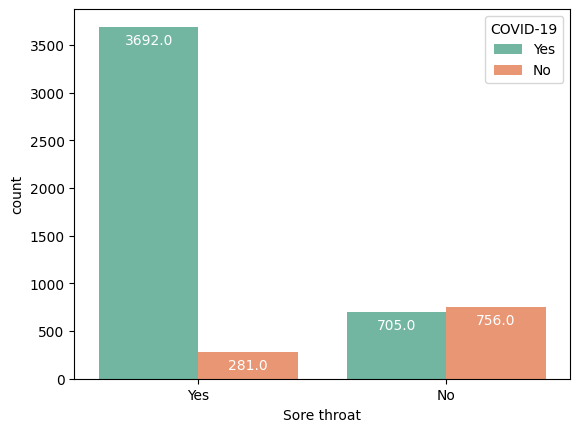

In [ ]:
ax = sns.countplot(x='Sore throat',hue='COVID-19',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

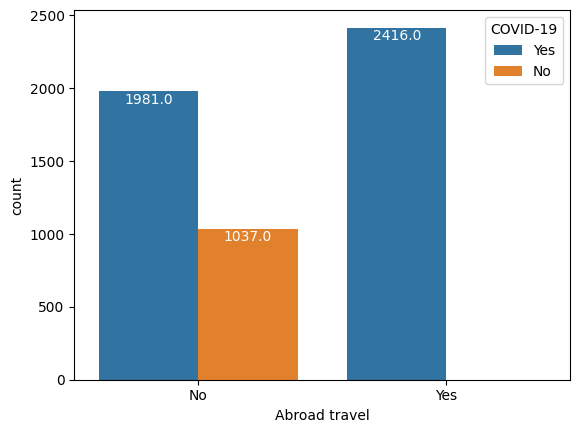

In [ ]:
ax = sns.countplot(x='Abroad travel',hue='COVID-19',data=covid_data)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

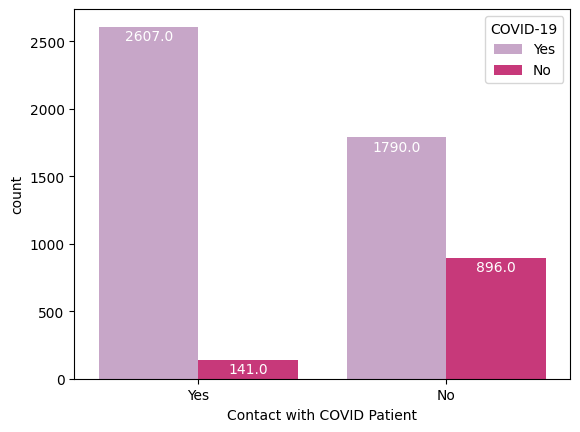

In [ ]:
ax = sns.countplot(x='Contact with COVID Patient',hue='COVID-19',data=covid_data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

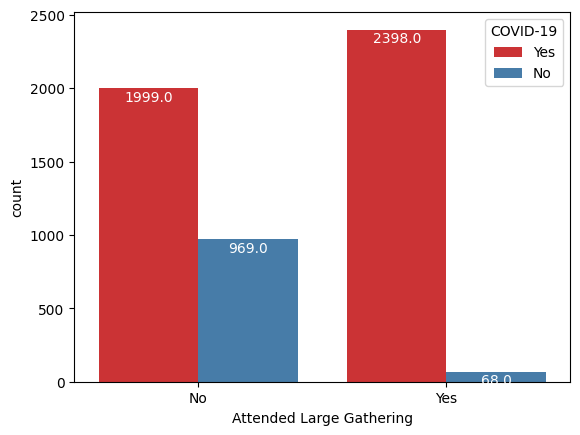

In [ ]:
ax = sns.countplot(x='Attended Large Gathering',hue='COVID-19',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

# 4.Data pre-processing

In [ ]:
e=LabelEncoder()

In [ ]:
columns = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19']

# Loop over each column and apply the encoder
for col in columns:
    covid_data[col] = e.fit_transform(covid_data[col])

In [ ]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [ ]:
covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


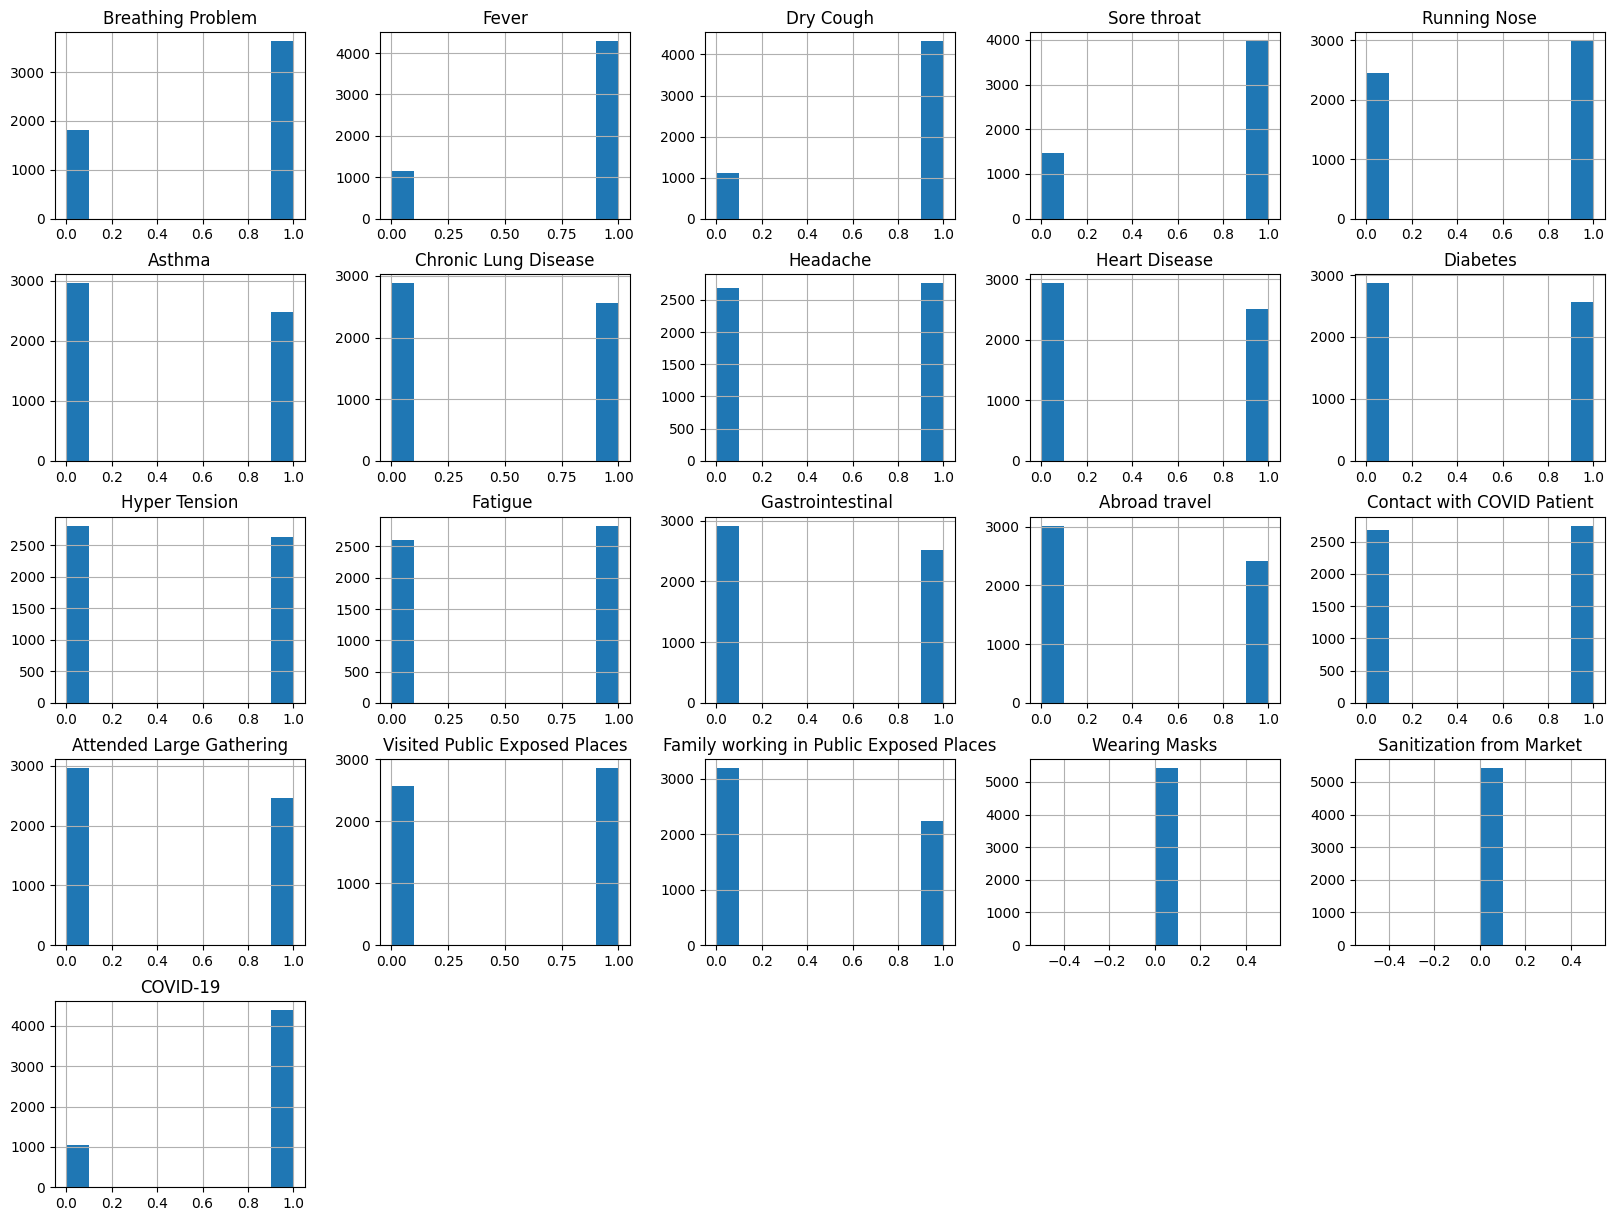

In [ ]:
covid_data.hist(figsize=(20,15));

0    5434
Name: Wearing Masks, dtype: int64


<Axes: xlabel='Wearing Masks', ylabel='count'>

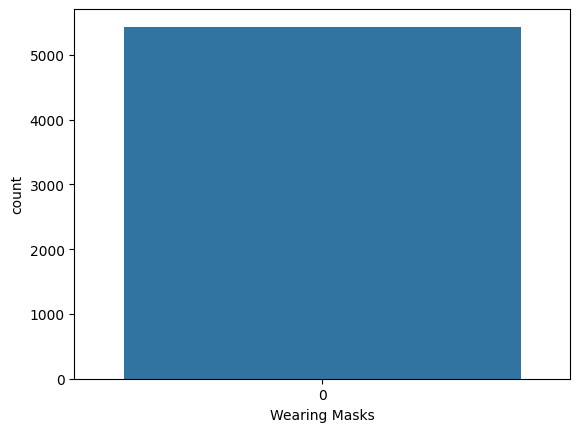

In [ ]:
print(covid_data['Wearing Masks'].value_counts())
sns.countplot(x='Wearing Masks',data=covid_data)

0    5434
Name: Sanitization from Market, dtype: int64


<Axes: xlabel='Sanitization from Market', ylabel='count'>

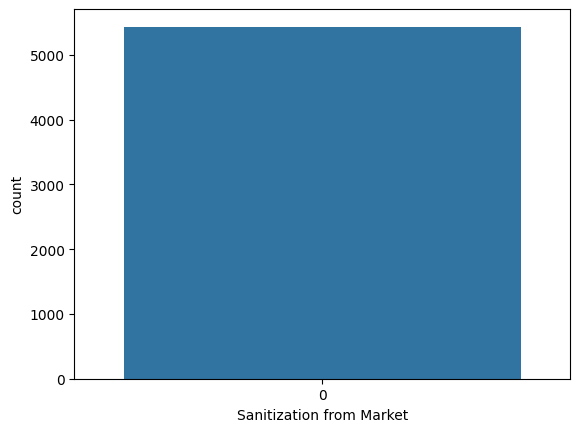

In [ ]:
print(covid_data['Sanitization from Market'].value_counts())
sns.countplot(x='Sanitization from Market',data=covid_data)

In [ ]:
covid_data=covid_data.drop('Wearing Masks',axis=1)
covid_data=covid_data.drop('Sanitization from Market',axis=1)

# Droping the attribute that are very less correlated with Covid-19

<Axes: >

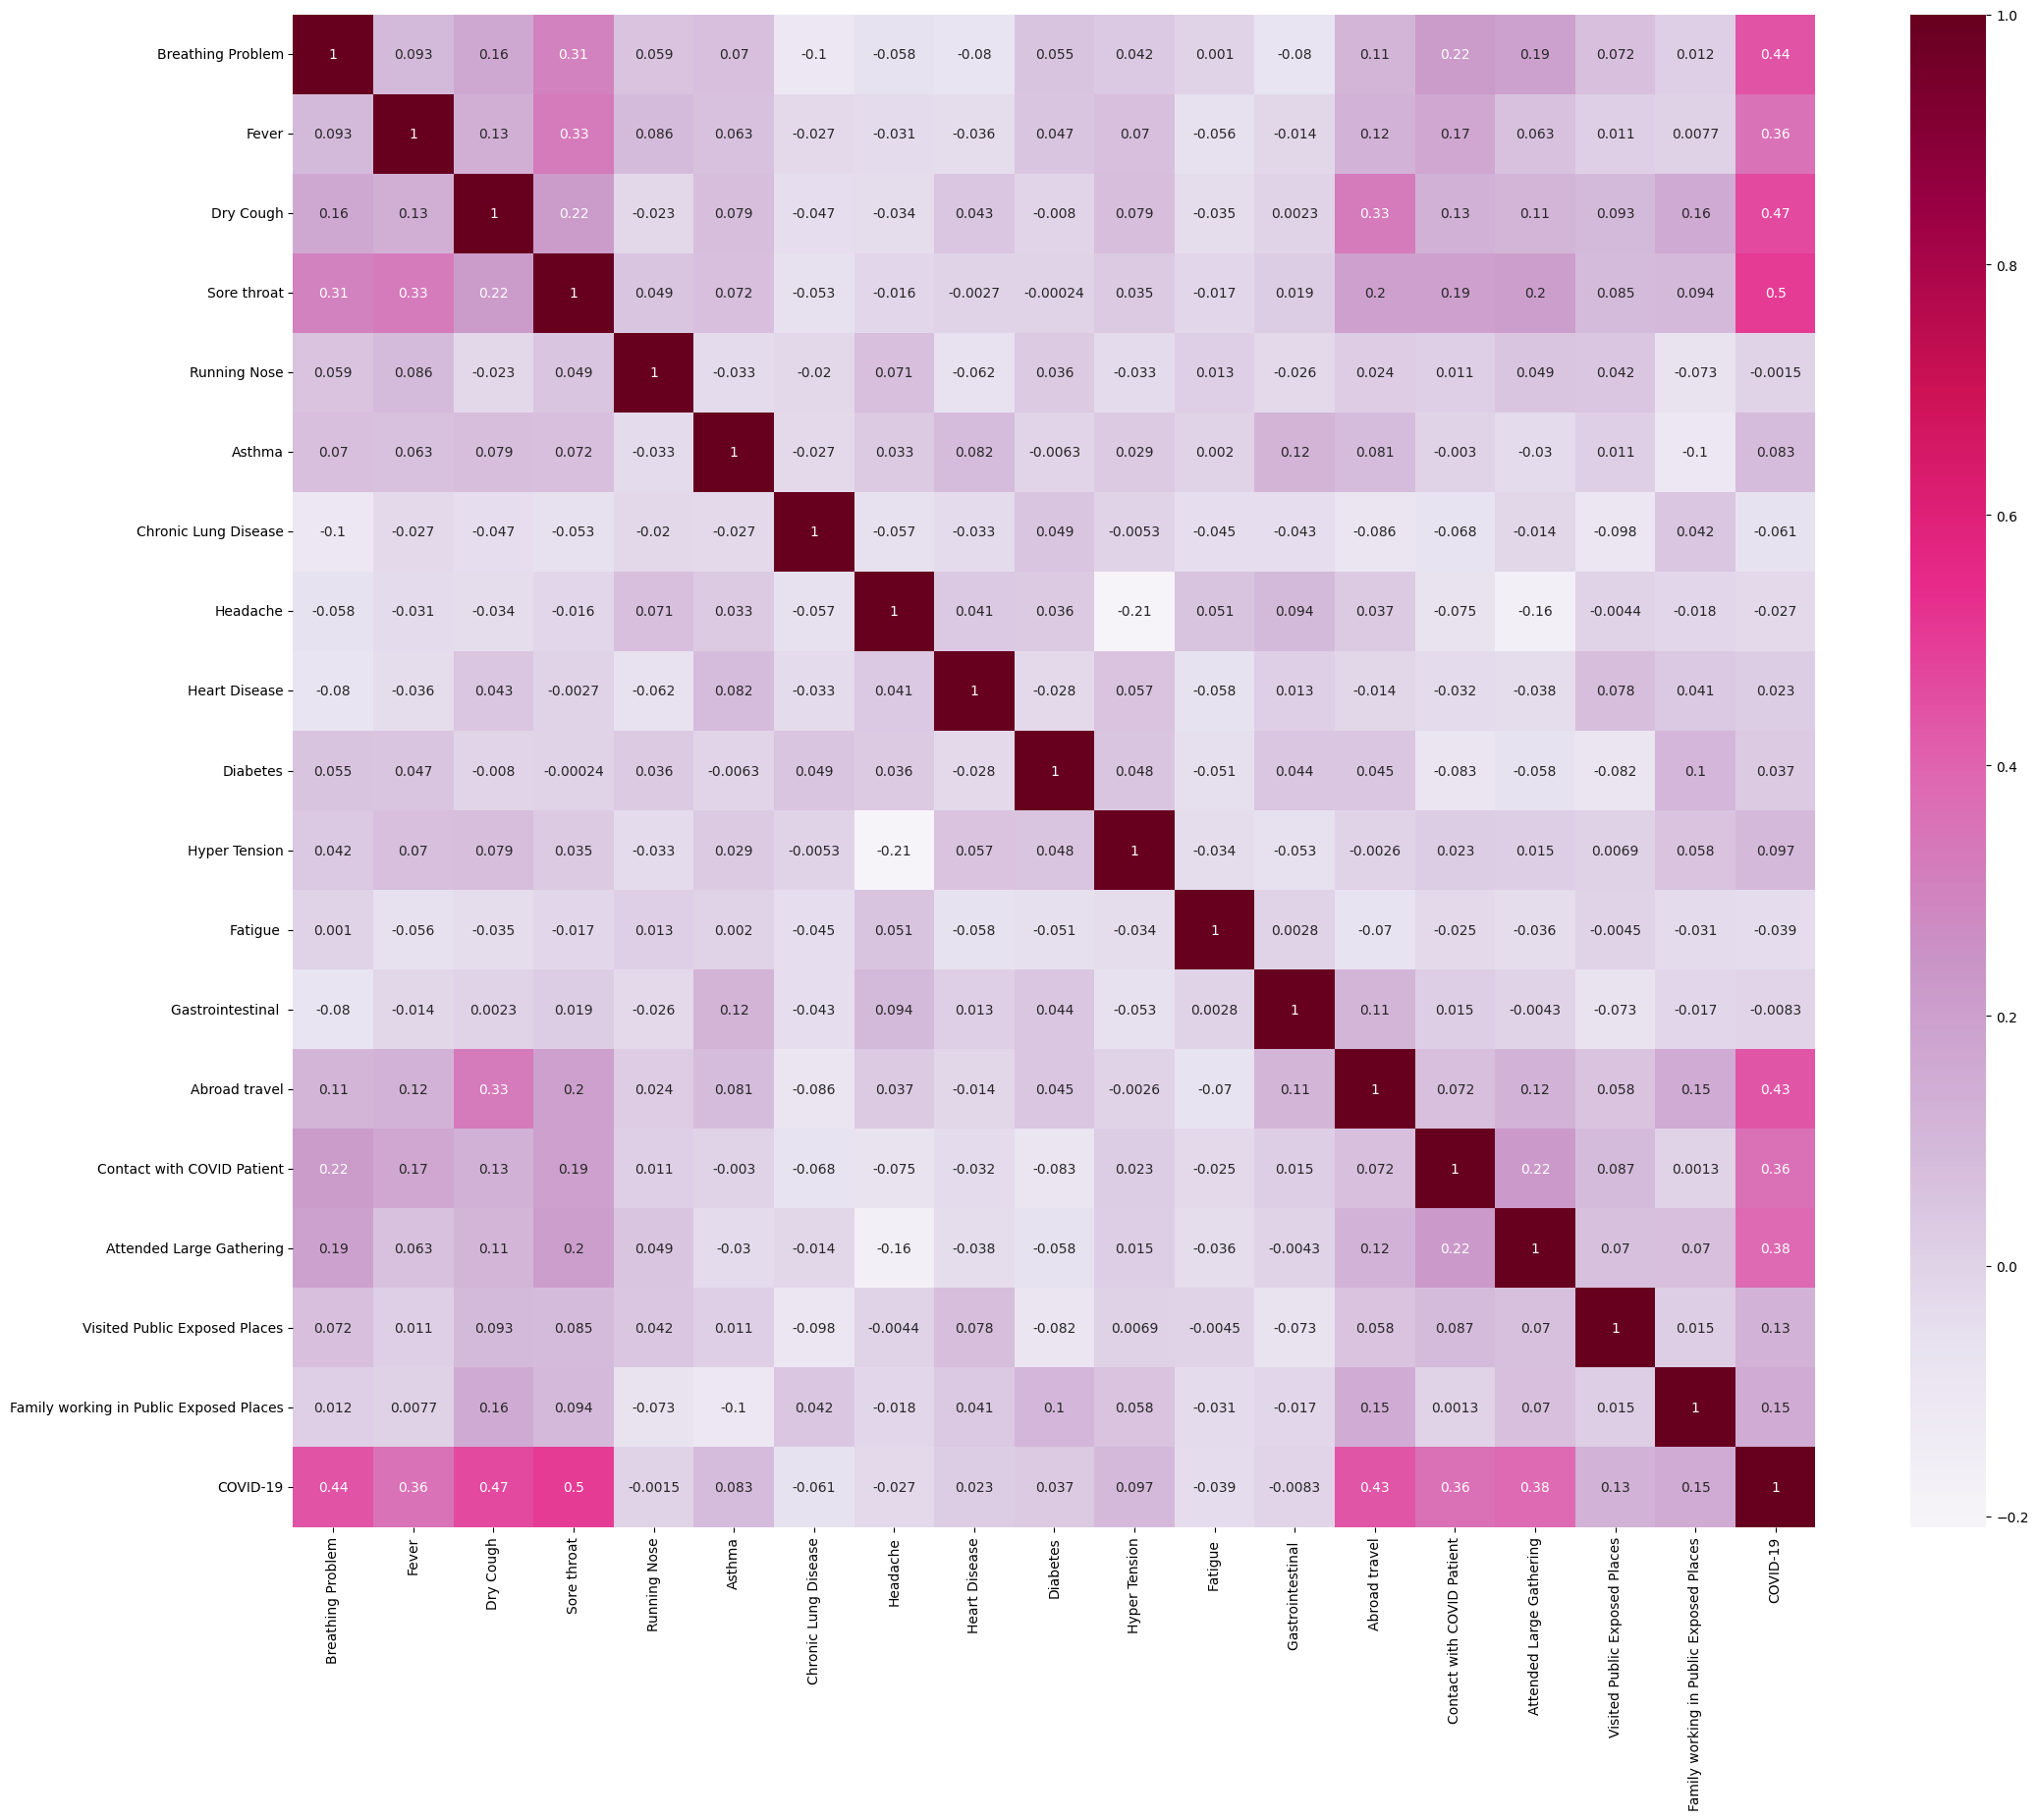

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(covid_data.corr(), annot=True, cmap="PuRd")  # Correlation among different parameter

In [ ]:
covid_data=covid_data.drop('Headache',axis=1)
covid_data=covid_data.drop('Heart Disease',axis=1)
covid_data=covid_data.drop('Diabetes',axis=1)
covid_data=covid_data.drop('Hyper Tension',axis=1)
covid_data=covid_data.drop('Fatigue ',axis=1)
covid_data=covid_data.drop('Gastrointestinal ',axis=1)
covid_data=covid_data.drop('Asthma',axis=1)

<Axes: >

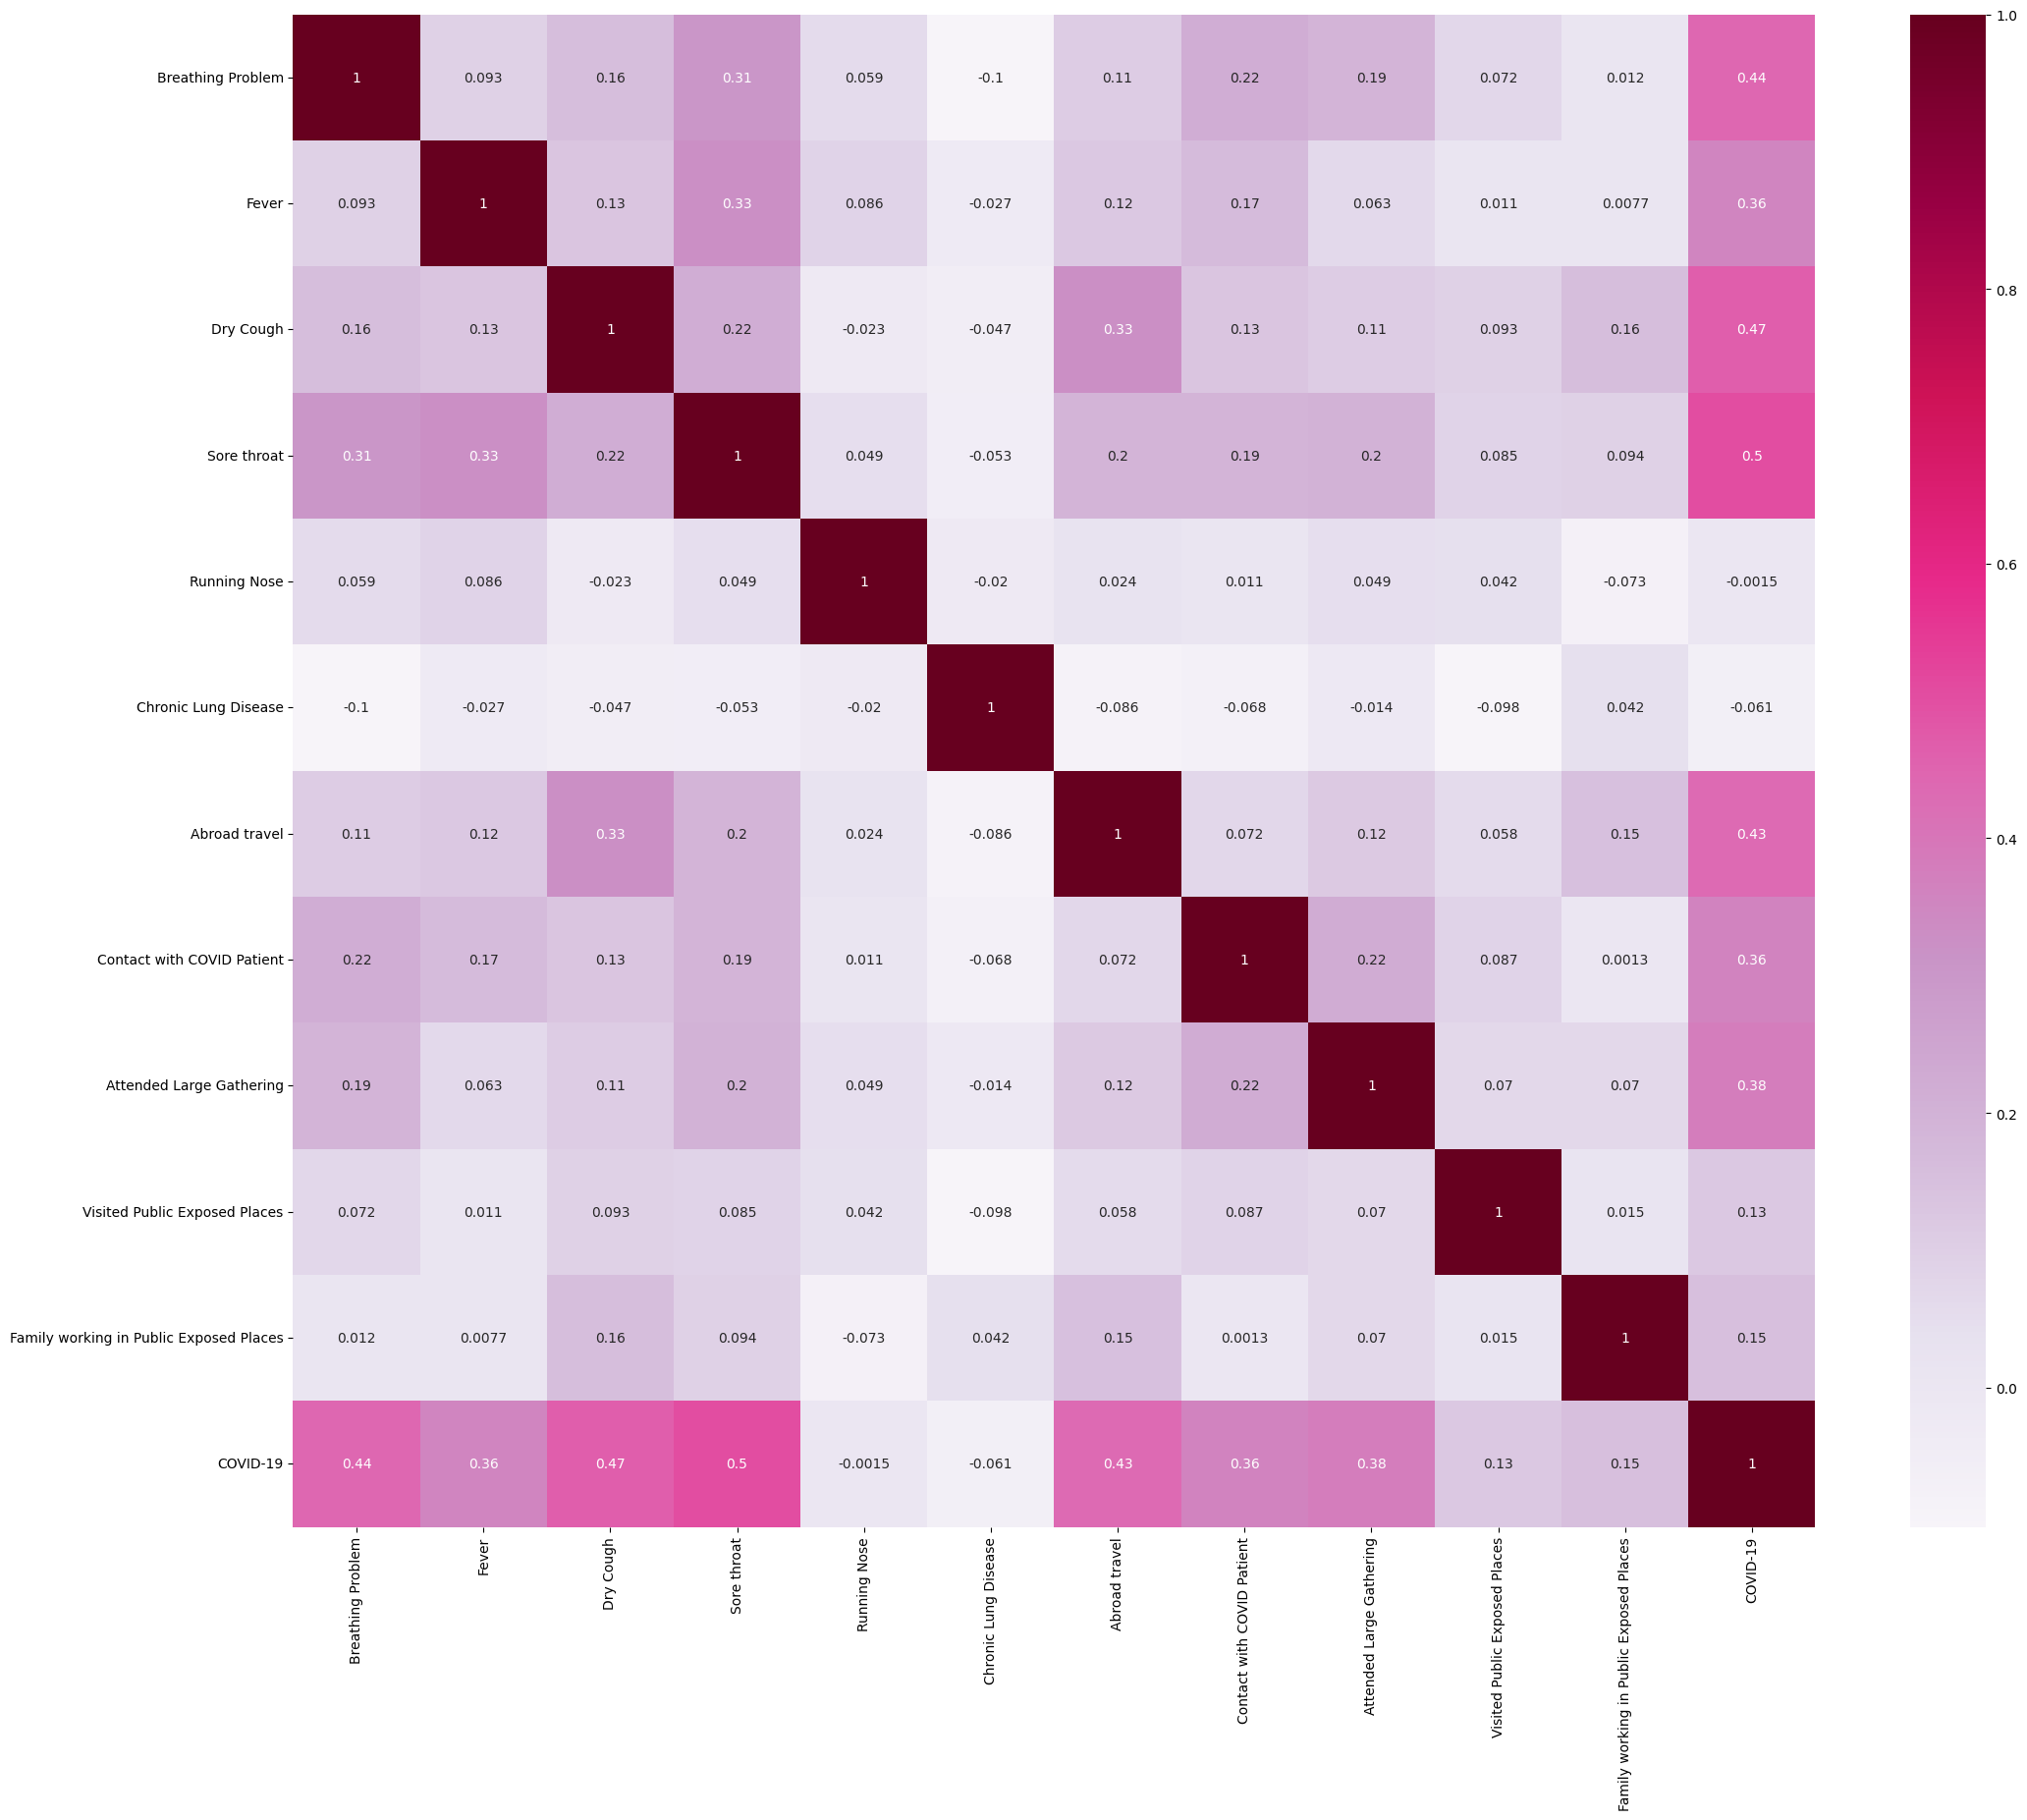

In [ ]:
 plt.figure(figsize=(25,20))
sns.heatmap(covid_data.corr(), annot=True, cmap="PuRd")  # Correlation among different parameter after dropping some of the attribute.

In [ ]:
x=covid_data.drop('COVID-19',axis=1)
y=covid_data['COVID-19']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [ ]:
accuracies = {}
algo_time={}
r2_scores={}
mean_squared_errors={}
roc_auc_scores={}

In [ ]:
def print_performance2(yt,clf,clf_name):
    y_pred=clf.predict(x_test)
    roc_auc_scores[clf_name]=roc_auc_score(yt,y_pred)*100
    mean_squared_errors[clf_name]=mean_squared_error(yt,y_pred)*100
    r2_scores[clf_name]=r2_score(yt,y_pred)*100
    accuracies[clf_name]=clf.score(x_train,y_train)*100
    print('ROC_AUC value :',roc_auc_scores[clf_name],"%",'\n')
    print("Mean Squared Error :",mean_squared_errors[clf_name],"%")
    print("\nR2 score is :",r2_scores[clf_name],"%")
    print("\nAccuracy Score :",accuracies[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))

    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

Logistic Regression

LOGISTIC REGRESSION
ROC_AUC value : 93.18068196020953 % 

Mean Squared Error : 3.1278748850046 %

R2 score is : 79.00376089352467 %

Accuracy Score : 96.87140556705775 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       198
           1       0.97      0.99      0.98       889

    accuracy                           0.97      1087
   macro avg       0.96      0.93      0.95      1087
weighted avg       0.97      0.97      0.97      1087



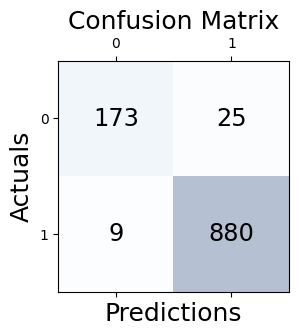

In [ ]:
print("LOGISTIC REGRESSION")
start = time.time()
lr = LogisticRegression()
lr.fit(x_train, y_train)
end = time.time()

print_performance2(y_test,lr,'LOGISTIC REGRESSION')
#acc = lr.score(x_train, y_train)*100
#accuracies['LOGISTIC REGRESSION'] = acc
algo_time['LOGISTIC REGRESSION']=end-start

LOGISTIC REGRESSION
ROC_AUC value : 93.23107498945218 %

Mean Squared Error : 3.035878564857406 %

R2 score is : 80.08627006861634 %

Accuracy Score : 97.03243616287095 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.96      0.87      0.92       204
           1       0.97      0.99      0.98       883

    accuracy                           0.97      1087
   macro avg       0.97      0.93      0.95      1087
weighted avg       0.97      0.97      0.97      1087


In [ ]:
start = time.time()
knn = KNeighborsClassifier()
# assigning the dictionary of variables whose optimium value is to be retrieved
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)
knn_cv = GridSearchCV(estimator=knn, param_grid=param_grid,cv=5)
# training the model with the training data and best parameter
knn_cv.fit(x_train,y_train)
end=time.time()
algo_time['K-NEAREST NEIGHBOURS']=end-start

In [ ]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(knn_cv.best_score_))


print("K-NEAREST NEIGHBOURS")
print_performance2(y_test,knn_cv,'K-NEAREST NEIGHBOURS')
#acc = knn_cv.score(x_train, y_train)*100
#accuracies['K-NEAREST NEIGHBOURS'] = acc



# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(CV_rfc.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(CV_rfc.best_score_*100))

In [ ]:
print("COVID PREDICTION BASED ON ML ALGORITHMS")
print("Enter 1 for Yes and 0 for No")
Breathing_Problem = int(input("Does the patient have breathing problem ? "))
Fever = int(input("Does the patient have fever ? "))
Dry_Cough = int(input("Does the patient have dry cough ? "))
Sore_throat = int(input("Does the patient have sore throat ? "))
Running_Nose = int(input("Does the patient have running nose ? "))
Asthma = int(input("Does the patient have any record of asthma ? "))
Chronic_Lung_Disease = int(input("Does the patient have any records of chronic lung disease ? "))
Headache = int(input("Is the patient having headche ? "))
Heart_Disease = int(input("Does the patient have any record of any heart disease ? "))
Diabetes = int(input("Does the patient have diabetes ? "))
Hyper_Tension = int(input("Does the patient have hyper tension ? "))
Fatigue = int(input("Does the patient experience fatigue ? "))
Gastrointestinal = int(input("Does the patient have any gastrointestinal disorders ? "))
Abroad_travel = int(input("Has the patient travelled abroad recently ? "))
Contact_with_COVID_Patient = int(input("Was the patient in contact with a covid patient recently ? "))
Attended_Large_Gathering = int(input("Did the patient attend any large gathering event recently ? "))
Visited_Public_Exposed_Places = int(input("Did the patient visit any public exposed places recently ? "))
Family_working_in_Public_Exposed_Places = int(input("Does the patient have any family member working in public exposed places ? "))

patient = [[Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places]]
result = knn_cv.predict(patient)
print("\nResults : ",result)

if result == 1:
    print(Fore.RED + 'You may be affected with COVID-19 virus! Please get RTPCR test ASAP and stay in Quarantine for 14 days!')
    print()
else :
    print(Fore.GREEN + 'You do not have any symptoms of COVID-19. Stay home! Stay safe!')
    print()